In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics


In [ ]:
heart_data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [ ]:
heart_data.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
for column in heart_data.columns:
  null_val = heart_data[column].isna().sum()
  print(f'{null_val} = {column}')

0 = age
0 = anaemia
0 = creatinine_phosphokinase
0 = diabetes
0 = ejection_fraction
0 = high_blood_pressure
0 = platelets
0 = serum_creatinine
0 = serum_sodium
0 = sex
0 = smoking
0 = time
0 = DEATH_EVENT


# What is the distribution of age among heart failure patients in the dataset

The Age distribution is :
count    299.000000
mean      60.833893
std       11.894809
min       40.000000
25%       51.000000
50%       60.000000
75%       70.000000
max       95.000000
Name: age, dtype: float64
 
 
The inter-quantile-range is :  19.0
 
 


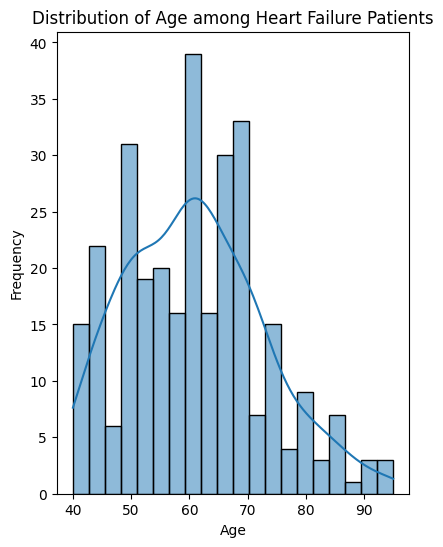

In [ ]:
age_distribution = heart_data.age.describe()
print('The Age distribution is :')
print(age_distribution)
print(' ')
print(' ')
inter_quantile_range = 70.000000 - 51.000000
print('The inter-quantile-range is : ', inter_quantile_range)
print(' ')
print(' ')
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.histplot(data=heart_data,x='age',bins=20,kde=True)
plt.ylabel('Frequency')
plt.xlabel('Age')
plt.title('Distribution of Age among Heart Failure Patients')
plt.show()


In [ ]:
#Observation : Most people with heart failures are in the age group of 50 to 70

# How does the death rate vary with age

In [ ]:
heart_data.DEATH_EVENT.value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

In [ ]:
death_count_per_age = heart_data[heart_data['DEATH_EVENT']==1]

In [ ]:
death_count_per_age

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.90,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.10,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.30,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.90,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.70,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,73.0,0,582,0,20,0,263358.03,1.83,134,1,0,198,1
230,60.0,0,166,0,30,0,62000.00,1.70,127,0,0,207,1
246,55.0,0,2017,0,25,0,314000.00,1.10,138,1,0,214,1
262,65.0,1,258,1,25,0,198000.00,1.40,129,1,0,235,1


In [ ]:
death_count_per_age['age'].describe()

count    96.000000
mean     65.215281
std      13.214556
min      42.000000
25%      55.000000
50%      65.000000
75%      75.000000
max      95.000000
Name: age, dtype: float64

In [ ]:
statistics.mode(death_count_per_age['age'])

60.0

In [ ]:

cov_age_death = death_count_per_age[['age', 'DEATH_EVENT']].cov().iloc[0, 1]
print('The covariance of age and DEATH_EVENT is:', cov_age_death)
print('')


The covariance of age and DEATH_EVENT is: 0.0



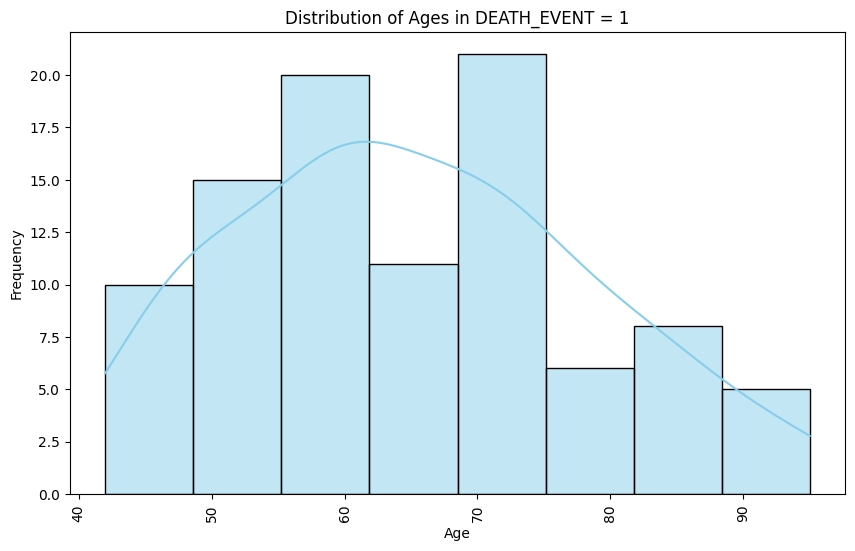

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(death_count_per_age['age'], color='skyblue', kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages in DEATH_EVENT = 1')
plt.xticks(rotation=90)
plt.show()

In [ ]:
top_10_age_counts = death_count_per_age['age'].value_counts().head(10)
top_10_age_counts

age
60.0    13
65.0     8
50.0     8
70.0     7
75.0     6
45.0     6
72.0     5
80.0     5
82.0     3
59.0     3
Name: count, dtype: int64

In [ ]:
low_10_age_counts = death_count_per_age['age'].value_counts().tail(10)
low_10_age_counts

age
77.0    1
54.0    1
94.0    1
49.0    1
53.0    1
57.0    1
51.0    1
87.0    1
62.0    1
73.0    1
Name: count, dtype: int64

In [ ]:
import pandas as pd


age_intervals = [(40, 49), (50, 59), (60, 69), (70, 79), (80, 89), (90, 100)]

total_death_event_count_by_age_group = {}

for interval in age_intervals:
    age_group_data = heart_data[(heart_data['age'] >= interval[0]) & (heart_data['age'] <= interval[1])]
    death_event_count = age_group_data[age_group_data['DEATH_EVENT'] == 1]['DEATH_EVENT'].count()
    total_death_event_count_by_age_group[interval] = death_event_count

total_death_event_count_total = heart_data[heart_data['DEATH_EVENT'] == 1]['DEATH_EVENT'].count()

correlation_by_age_group = {}

for interval, count in total_death_event_count_by_age_group.items():
    correlation = count / total_death_event_count_total
    correlation_by_age_group[interval] = correlation

for interval, correlation in correlation_by_age_group.items():
    print(f"Age group: {interval}, Correlation with total Death_Event count (Death_Event = 1): {correlation}")


Age group: (40, 49), Correlation with total Death_Event count (Death_Event = 1): 0.11458333333333333
Age group: (50, 59), Correlation with total Death_Event count (Death_Event = 1): 0.20833333333333334
Age group: (60, 69), Correlation with total Death_Event count (Death_Event = 1): 0.28125
Age group: (70, 79), Correlation with total Death_Event count (Death_Event = 1): 0.20833333333333334
Age group: (80, 89), Correlation with total Death_Event count (Death_Event = 1): 0.13541666666666666
Age group: (90, 100), Correlation with total Death_Event count (Death_Event = 1): 0.052083333333333336


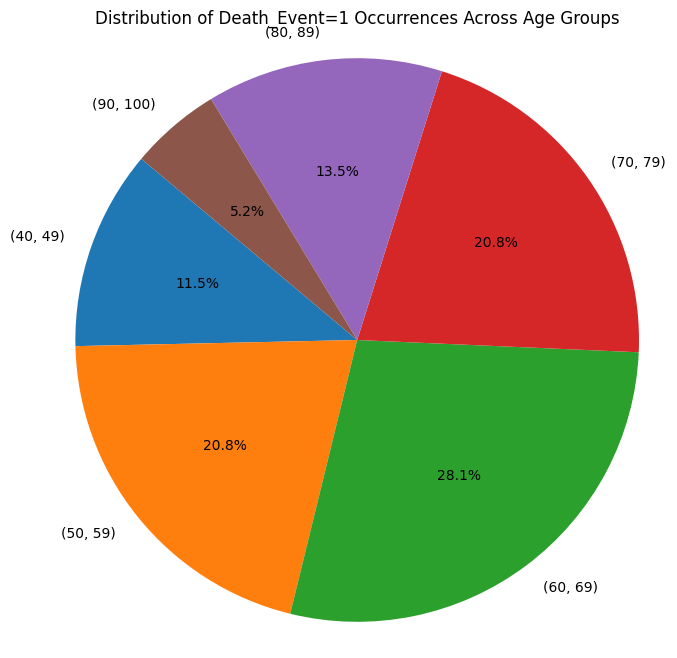

In [ ]:
import matplotlib.pyplot as plt


age_groups = ['(40, 49)', '(50, 59)', '(60, 69)', '(70, 79)', '(80, 89)', '(90, 100)']
correlation_values = [0.11458333333333333, 0.20833333333333334, 0.28125, 0.20833333333333334, 0.13541666666666666, 0.052083333333333336]


plt.figure(figsize=(8, 8))
plt.pie(correlation_values, labels=age_groups, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Death_Event=1 Occurrences Across Age Groups')
plt.axis('equal')
plt.show()


In [ ]:
# As we can see, the age group of 60 to 70 has the maximum death occurence, with the leading age groups of 50 to 60 and 70 to 80

#  What is the percentage of male and female patients in the dataset?

In [ ]:
heart_data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
gender_percentage = heart_data['sex'].value_counts(normalize=True)*100
gender_percentage

sex
1    64.882943
0    35.117057
Name: proportion, dtype: float64

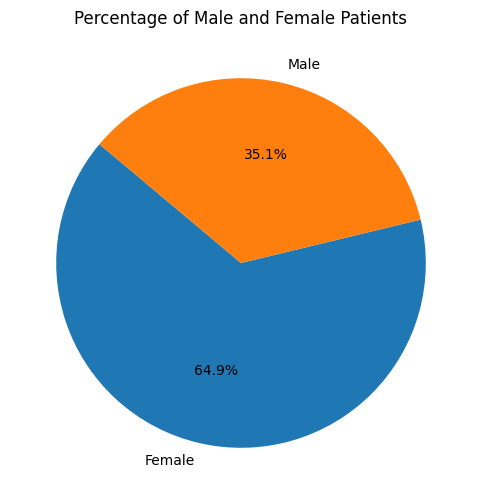

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(gender_percentage, labels=['Female', 'Male'], autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Male and Female Patients')
plt.show()


In [ ]:
#There are more females than males in the dataset given

# How does the platelets vary among the different age group?

In [ ]:
highest_value = heart_data['age'].max()
lowest_value = heart_data['age'].min()

print("Highest value:", highest_value)
print("Lowest value:", lowest_value)

Highest value: 95.0
Lowest value: 40.0


In [ ]:
age_1 = heart_data[(heart_data['age'] >= 40) & (heart_data['age'] < 50)]
print('Standard deviation of Platelets for the age-group between 40 and 50 years old: ', statistics.stdev(age_1['platelets']))
print('Sample Variance of Platelets for the age-group between 40 and 50 years old: ', statistics.variance(age_1['platelets']))
print('Population Variance of Platelets for the age-group between 40 and 50 years old: ', statistics.pvariance(age_1['platelets']))

Standard deviation of Platelets for the age-group between 40 and 50 years old:  141518.4021535042
Sample Variance of Platelets for the age-group between 40 and 50 years old:  20027458148.08094
Population Variance of Platelets for the age-group between 40 and 50 years old:  19601342017.270706


In [ ]:
age_2 = heart_data[(heart_data['age'] >= 50) & (heart_data['age'] < 60)]
print('Standard deviation of Platelets for the age-group between 50 and 60 years old:  ', statistics.stdev(age_2['platelets']))
print('Sample Variance of Platelets for the age-group between 50 and 60 years old: ', statistics.variance(age_2['platelets']))
print('Population Variance of Platelets for the age-group between 50 and 60 years old: ', statistics.pvariance(age_2['platelets']))

Standard deviation of Platelets for the age-group between 50 and 60 years old:   83484.17282728337
Sample Variance of Platelets for the age-group between 50 and 60 years old:  6969607112.65572
Population Variance of Platelets for the age-group between 50 and 60 years old:  6884611903.964796


In [ ]:
age_3 = heart_data[(heart_data['age'] >= 60) & (heart_data['age'] < 70)]
print('Standard deviation of Platelets for the age-group between 60 and 70 years old: ', statistics.stdev(age_3['platelets']))
print('Sample Variance of Platelets for the age-group between 60 and 70 years old: ', statistics.variance(age_3['platelets']))
print('Population Variance of Platelets for the age-group between 60 and 70 years old: ', statistics.pvariance(age_3['platelets']))

Standard deviation of Platelets for the age-group between 60 and 70 years old:  76019.87085415375
Sample Variance of Platelets for the age-group between 60 and 70 years old:  5779020764.682215
Population Variance of Platelets for the age-group between 60 and 70 years old:  5716880756.4598255


In [ ]:
age_4 = heart_data[(heart_data['age'] >= 70) & (heart_data['age'] < 80)]
print('Standard deviation of Platelets for the age-group between 70 and 80 years old: ', statistics.stdev(age_4['platelets']))
print('Sample Variance of Platelets for the age-group between 70 and 80 years old: ', statistics.variance(age_4['platelets']))
print('Population Variance of Platelets for the age-group between 70 and 80 years old: ', statistics.pvariance(age_4['platelets']))

Standard deviation of Platelets for the age-group between 70 and 80 years old:  101173.88070886457
Sample Variance of Platelets for the age-group between 70 and 80 years old:  10236154137.691557
Population Variance of Platelets for the age-group between 70 and 80 years old:  10039305019.659027


In [ ]:
age_5 = heart_data[(heart_data['age'] >= 80) & (heart_data['age'] < 90)]
print('Standard deviation of Platelets for the age-group between 80 and 90 years old: ', statistics.stdev(age_5['platelets']))
print('Sample Variance of Platelets for the age-group between 80 and 90 years old: ', statistics.variance(age_5['platelets']))
print('Population Variance of Platelets for the age-group between 80 and 90 years old: ', statistics.pvariance(age_5['platelets']))

Standard deviation of Platelets for the age-group between 80 and 90 years old:  105430.55616016066
Sample Variance of Platelets for the age-group between 80 and 90 years old:  11115602172.240791
Population Variance of Platelets for the age-group between 80 and 90 years old:  10530570478.96496


In [ ]:
age_6 = heart_data[(heart_data['age'] >= 90) & (heart_data['age'] < 100)]
print('Standard deviation of Platelets for the age-group between 80 and 90 years old: ', statistics.stdev(age_6['platelets']))
print('Sample Variance of Platelets for the age-group between 80 and 90 years old: ', statistics.variance(age_6['platelets']))
print('Population Variance of Platelets for the age-group between 80 and 90 years old: ', statistics.pvariance(age_6['platelets']))

Standard deviation of Platelets for the age-group between 80 and 90 years old:  109798.7005398826
Sample Variance of Platelets for the age-group between 80 and 90 years old:  12055754640.246817
Population Variance of Platelets for the age-group between 80 and 90 years old:  10046462200.20568


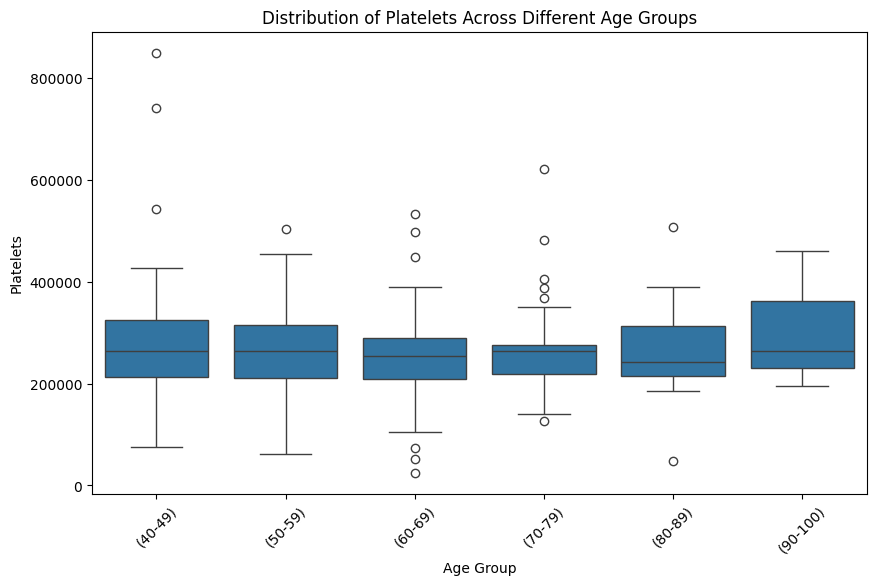

<ipython-input-141-022367957d80>:27: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(group_data['platelets'], hist=False, label=age_group)
<ipython-input-141-022367957d80>:27: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(group_data['platelets'], hist=False, label=age_group)
<ipy

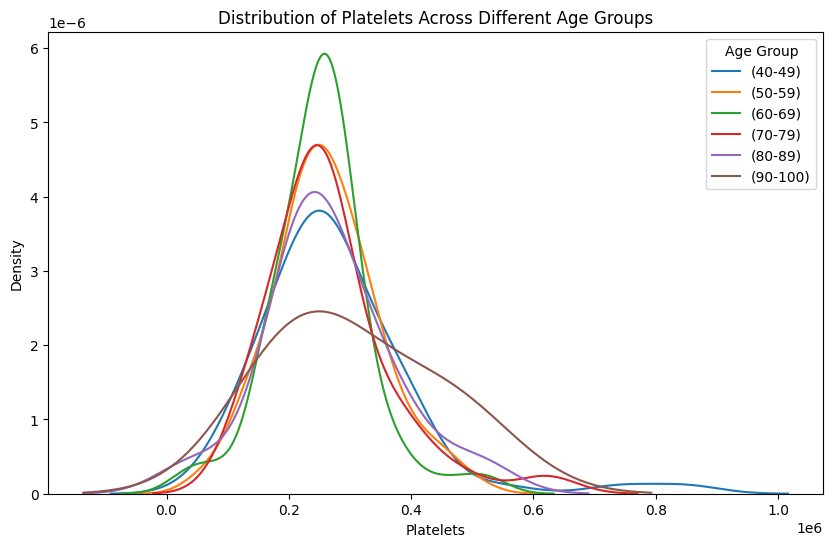

Age group: (40-49), Correlation between Platelets and Age: -0.11520707058609801
Age group: (50-59), Correlation between Platelets and Age: -0.19179588007062423
Age group: (60-69), Correlation between Platelets and Age: 0.010846268129009433
Age group: (70-79), Correlation between Platelets and Age: -0.13142556169174524
Age group: (80-89), Correlation between Platelets and Age: 0.21579528231268721
Age group: (90-100), Correlation between Platelets and Age: 0.2730600095064803


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

age_bins = [40, 50, 60, 70, 80, 90, 100]
age_labels = ['(40-49)', '(50-59)', '(60-69)', '(70-79)', '(80-89)', '(90-100)']
heart_data['age_group'] = pd.cut(heart_data['age'], bins=age_bins, labels=age_labels)

platelets_summary = heart_data.groupby('age_group')['platelets'].describe()

plt.figure(figsize=(10, 6))
sns.boxplot(x='age_group', y='platelets', data=heart_data)
plt.xlabel('Age Group')
plt.ylabel('Platelets')
plt.title('Distribution of Platelets Across Different Age Groups')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
for age_group, group_data in heart_data.groupby('age_group'):
    sns.distplot(group_data['platelets'], hist=False, label=age_group)
plt.xlabel('Platelets')
plt.ylabel('Density')
plt.title('Distribution of Platelets Across Different Age Groups')
plt.legend(title='Age Group')
plt.show()

correlation_by_age_group = {}
for age_group, group_data in heart_data.groupby('age_group'):
    correlation = group_data['platelets'].corr(group_data['age'])
    correlation_by_age_group[age_group] = correlation


for age_group, correlation in correlation_by_age_group.items():
    print(f"Age group: {age_group}, Correlation between Platelets and Age: {correlation}")




- For the age group `(40-49)`, the correlation between platelets and age is approximately -0.12. This suggests a weak negative linear relationship, indicating that as` age increases , platelet levels tend to slightly decrease`.
- For the age group `(50-59)`, the correlation between platelets and age is approximately -0.19. This also suggests a weak negative linear relationship, indicating that as `age increases, platelet levels tend to slightly decrease`.
- For the age group `(60-69)`, the correlation between platelets and age is approximately 0.01. This value is close to zero, suggesting almost `no linear relationship between platelets and age within this age group.`
- For the age group `(70-79)`, the correlation between platelets and age is approximately -0.13. This suggests a weak negative linear relationship, indicating that as `age increases, platelet levels tend to slightly decrease.`
- For the age group `(80-89)`, the correlation between platelets and age is approximately 0.22. This suggests a moderate positive linear relationship, indicating that as `age increases, platelet levels tend to slightly increase.`
- For the age group `(90-100)`, the correlation between platelets and age is approximately 0.27. This suggests a moderate positive linear relationship, indicating that as `age increases, platelet levels tend to slightly increase.`



In [ ]:
#With an increase in age, there is an increase of platelets in heart-patients
#The most number of platelets are present in 90 - 100 age group with the least number of platelets present in 70 - 79
#The most number of outliers are present in the age groups of 60 to 80, with the least amount of outliers present in the age group of 50 to 60 and no outliers present in the age-group of 90 to 100
#The person with the most number of platelet count is present in the age group of 40 to 50
#The person with the least number of platelet count is present in the age group of 60 to 70

<Axes: >

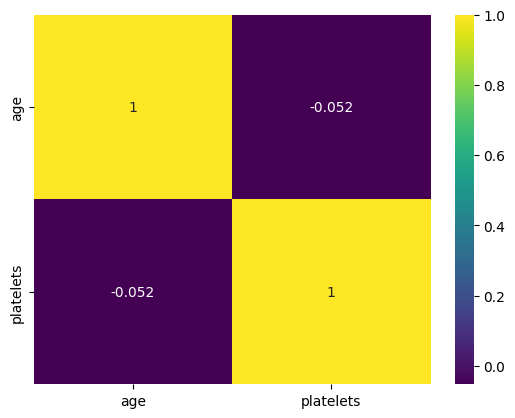

In [ ]:
sns.heatmap(heart_data[selected_1].corr(),annot=True,cmap='viridis')

In [ ]:

std_dev_1 = [statistics.stdev(age_1['platelets']),statistics.stdev(age_2['platelets']),statistics.stdev(age_3['platelets']),statistics.stdev(age_4['platelets']),statistics.stdev(age_5['platelets']),statistics.stdev(age_6['platelets'])]

In [ ]:
for i in std_dev_1:
  print(i)

141518.4021535042
83484.17282728337
76019.87085415375
101173.88070886457
105430.55616016066
109798.7005398826


In [ ]:
std_dev_1 = sorted(std_dev_1)

In [ ]:
for i in std_dev_1:
  print(i)

76019.87085415375
83484.17282728337
101173.88070886457
105430.55616016066
109798.7005398826
141518.4021535042


# Is there a correlation between creatinine and sodium levels in the blood?

In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
select_2 = ['serum_creatinine','serum_sodium']

In [ ]:
heart_data[select_2].corr()

,serum_creatinine,serum_sodium
serum_creatinine,1.000000,-0.189095
serum_sodium,-0.189095,1.000000


<Axes: >

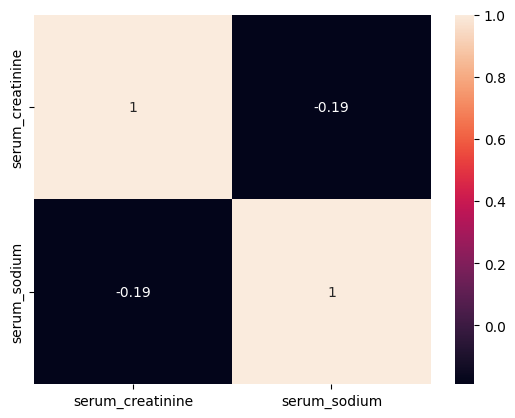

In [ ]:
sns.heatmap(heart_data[select_2].corr(),annot=True)

In [ ]:
#There is a negative correlation present between the sodium and the creatinine levels : with 1 unit increase in creatinine level, there is a 0.19 decrease in the sodium level

# How does the prevalence of high blood pressure differ between male and female patients?

In [ ]:
heart_data.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [ ]:
heart_data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [ ]:
high_BP_G = pd.crosstab(heart_data['sex'],heart_data['high_blood_pressure'])

In [ ]:
high_BP_G

high_blood_pressure,0,1
sex,,
0,61,44
1,133,61


Text(0, 0.5, 'Count')

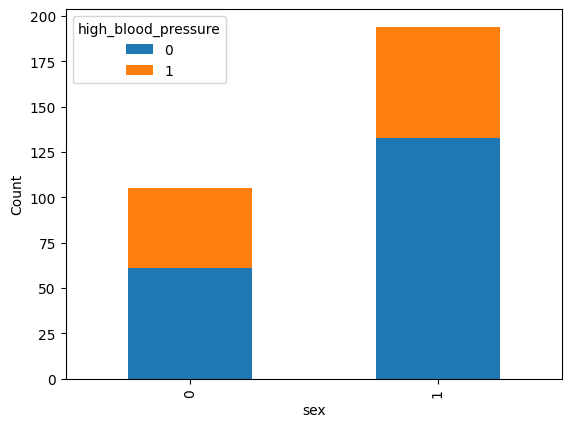

In [ ]:
high_BP_G.plot(kind='bar',stacked=True)
plt.ylabel('Count')

In [ ]:
x=heart_data[heart_data['high_blood_pressure'] == 1]['high_blood_pressure'].value_counts()
a = x.values[0]
a

105

In [ ]:
y = heart_data[(heart_data['sex'] == 1) & (heart_data['high_blood_pressure'] == 1)]['high_blood_pressure']
b = y.values.sum()
b


61

In [ ]:
z = heart_data[(heart_data['sex'] == 0) & (heart_data['high_blood_pressure'] == 1)]['high_blood_pressure']
c = z.values.sum()
c


44

In [ ]:
print('Percentage of Males with High blood Pressure : ',((b/a)*100))

Percentage of Males with High blood Pressure :  58.0952380952381


In [ ]:
print('Percentage of Females with High blood Pressure : ',((c/a)*100.0))

Percentage of Females with High blood Pressure :  41.904761904761905


In [ ]:
import plotly.graph_objects as go


males_high_bp = heart_data[(heart_data['sex']) & (heart_data['high_blood_pressure'] == 1)]

age_counts = males_high_bp['age'].value_counts()

labels = ['Age Distribution']
labels.extend(age_counts.index.astype(str))


parents = ['']
parents.extend(['Age Distribution'] * len(age_counts))


values = [len(males_high_bp)]
values.extend(age_counts.values)


colors = ['lightgreen']
colors.extend(['black'] * len(age_counts))


fig = go.Figure(go.Sunburst(
    labels=labels,
    parents=parents,
    values=values,
    branchvalues='total',
    marker=dict(colors=colors),
))


fig.update_layout(
    title='Age Distribution with High Blood Pressure',
    sunburstcolorway=['#1f77b4', '#ff7f0e'],
)


fig.show()


In [ ]:
import plotly.graph_objects as go


males_high_bp = heart_data[(heart_data['sex'] == 0) & (heart_data['high_blood_pressure'] == 1)]


age_counts = males_high_bp['age'].value_counts()


labels = ['Age Distribution']
labels.extend(age_counts.index.astype(str))


parents = ['']
parents.extend(['Age Distribution'] * len(age_counts))


values = [len(males_high_bp)]
values.extend(age_counts.values)


colorscale = [[0, 'rgb(230,230,255)'], [1, 'rgb(128,0,128)']]


fig = go.Figure(go.Sunburst(
    labels=labels,
    parents=parents,
    values=values,
    branchvalues='total',
    marker=dict(colors=values, colorscale=colorscale),
))


fig.update_layout(
    title='3D Age Distribution of Females with High Blood Pressure',
    scene=dict(
        xaxis=dict(visible=False),
        yaxis=dict(visible=False),
        zaxis=dict(visible=False),
        aspectmode="cube",
    )
)


fig.show()


In [ ]:
import plotly.graph_objects as go


males_high_bp = heart_data[(heart_data['sex'] == 1) & (heart_data['high_blood_pressure'] == 1)]


age_counts = males_high_bp['age'].value_counts()


labels = ['Age Distribution']
labels.extend(age_counts.index.astype(str))


parents = ['']
parents.extend(['Age Distribution'] * len(age_counts))


values = [len(males_high_bp)]
values.extend(age_counts.values)


colorscale = [[0, 'rgb(230,151,255)'], [1, 'rgb(128,0,128)']]


fig = go.Figure(go.Sunburst(
    labels=labels,
    parents=parents,
    values=values,
    branchvalues='total',
    marker=dict(colors=values, colorscale=colorscale),
))


fig.update_layout(
    title='3D Age Distribution of Males with High Blood Pressure',
    scene=dict(
        xaxis=dict(visible=False),
        yaxis=dict(visible=False),
        zaxis=dict(visible=False),
        aspectmode="cube",
    )
)


fig.show()


In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
heart_data.time

0        4
1        6
2        7
3        7
4        8
      ... 
294    270
295    271
296    278
297    280
298    285
Name: time, Length: 299, dtype: int64

In [ ]:
#Most Males have High Pressure compared to the Female Patients
#Percentage of Males with High blood Pressure :  58.09%
#Percentage of Females with High blood Pressure :  41.90%
#The Males have the Highest Occurence of High BP in the age group of 50 to 80
#The Females have the Highest Occurence of High BP in the age group of 60 to 70
#High BP is definitely more spread out in the population of Male Patients as compared to Female Patients

# What is the relationship between smoking habits and the occurrence of heart failure?

In [ ]:
heart_data.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [ ]:
heart_data['ejection_fraction'].cov(heart_data['smoking'])

-0.37257300621759337

In [ ]:
select_3 = ['ejection_fraction','smoking']

In [ ]:
heart_data[select_3].corr()

,ejection_fraction,smoking
ejection_fraction,1.000000,-0.067315
smoking,-0.067315,1.000000


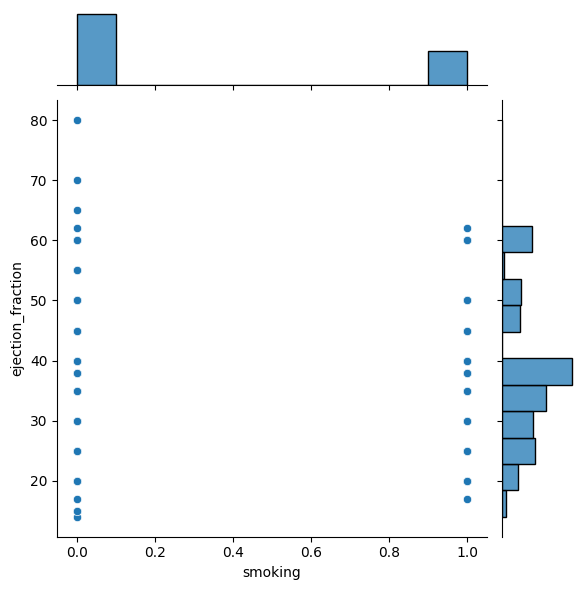

In [ ]:
sns.jointplot(data=heart_data, x='smoking', y='ejection_fraction', kind='scatter')

In [ ]:
#From the given observation, it is evident that patients who smoke have less ejection fraction of blood as compared to patients who don't smoke

# Are there any notable patterns in the distribution of death events across different age groups?

In [ ]:
df = heart_data[heart_data['DEATH_EVENT']==1]

In [ ]:
df['age'].value_counts()

age
60.000    13
65.000     8
50.000     8
70.000     7
75.000     6
45.000     6
72.000     5
80.000     5
82.000     3
59.000     3
85.000     3
55.000     3
58.000     2
69.000     2
48.000     2
95.000     2
68.000     2
90.000     2
42.000     1
60.667     1
46.000     1
86.000     1
77.000     1
54.000     1
94.000     1
49.000     1
53.000     1
57.000     1
51.000     1
87.000     1
62.000     1
73.000     1
Name: count, dtype: int64

In [ ]:
df1 = heart_data[(heart_data['DEATH_EVENT']==1)&(heart_data['smoking']==1)]

In [ ]:


x = df1['age'].value_counts()
x

age
60.0    5
72.0    4
70.0    3
65.0    2
80.0    2
85.0    2
50.0    2
58.0    1
59.0    1
69.0    1
82.0    1
49.0    1
90.0    1
68.0    1
62.0    1
75.0    1
55.0    1
Name: count, dtype: int64

In [ ]:

x1 = x.values
x1.sum()

30

In [ ]:
df2 = heart_data[(heart_data['DEATH_EVENT']==1)&(heart_data['smoking']==0)]

In [ ]:
y = df2['age'].value_counts()
y

age
60.000    8
45.000    6
50.000    6
65.000    6
75.000    5
70.000    4
80.000    3
55.000    2
59.000    2
82.000    2
95.000    2
48.000    2
58.000    1
42.000    1
54.000    1
77.000    1
60.667    1
72.000    1
46.000    1
86.000    1
53.000    1
94.000    1
68.000    1
57.000    1
87.000    1
51.000    1
90.000    1
69.000    1
85.000    1
73.000    1
Name: count, dtype: int64

In [ ]:

y1 = y.values
y1.sum()

66

<ipython-input-57-0434a0293f58>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




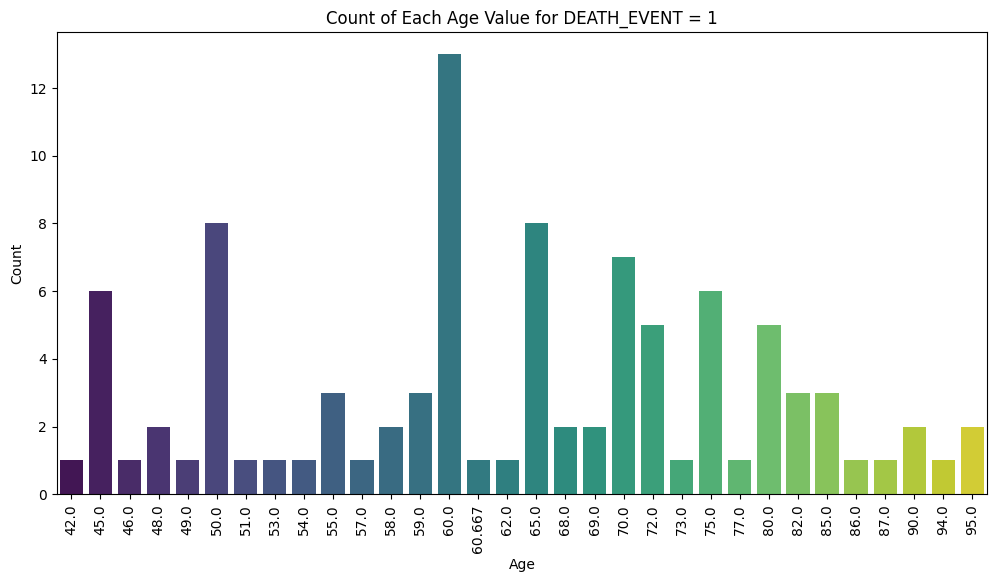

In [ ]:
df_death = heart_data[heart_data['DEATH_EVENT'] == 1]


plt.figure(figsize=(12, 6))
sns.countplot(data=df_death, x='age', palette='viridis')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Count of Each Age Value for DEATH_EVENT = 1')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_1 = df_death[df_death['smoking']==1]
v1 = df_1['age'].value_counts().sum()
v1

30

In [ ]:
df_2 = df_death[df_death['smoking']==0]
v2 = df_2['age'].value_counts().sum()
v2

66

In [ ]:
a1 = (heart_data[heart_data['DEATH_EVENT'] == 1]['age']).value_counts().sum()
a1


96

In [ ]:
print("% of deaths that occur due to smoking  : ",((v1/a1)*100))

% of deaths that occur due to smoking  :  31.25


In [ ]:
print("% of deaths that occur not due to smoking  : ",((v2/a1)*100))

% of deaths that occur not due to smoking  :  68.75


In [ ]:
import numpy as np
import pandas as pd


age_groups = [(40, 50), (50, 60), (60, 70), (70, 80), (80, 90), (90, 100)]


summary_statistics = []
frequency_distribution = []

for age_group in age_groups:

    filtered_data = heart_data[(heart_data['age'] >= age_group[0]) & (heart_data['age'] < age_group[1])]


    mean_age = filtered_data['age'].mean()
    median_age = filtered_data['age'].median()
    mode_age = filtered_data['age'].mode().values[0] if not filtered_data['age'].mode().empty else np.nan
    std_age = filtered_data['age'].std()
    quartiles_age = filtered_data['age'].quantile([0.25, 0.5, 0.75]).values


    death_event_counts = filtered_data['DEATH_EVENT'].value_counts()
    death_event_distribution = {'Survived': death_event_counts.get(0, 0), 'Deceased': death_event_counts.get(1, 0)}


    summary_statistics.append({
        'Age Group': age_group,
        'Mean Age': mean_age,
        'Median Age': median_age,
        'Mode Age': mode_age,
        'Standard Deviation': std_age,
        'Quartiles': quartiles_age
    })

    frequency_distribution.append({
        'Age Group': age_group,
        'Frequency Distribution': death_event_distribution
    })


summary_statistics_df = pd.DataFrame(summary_statistics)
frequency_distribution_df = pd.DataFrame(frequency_distribution)


print("Summary Statistics:")
print(summary_statistics_df)

print("\nFrequency Distribution of Death Events:")
print(frequency_distribution_df)


Summary Statistics:
   Age Group   Mean Age  Median Age  Mode Age  Standard Deviation  \
0   (40, 50)  44.212766        45.0      45.0            2.636996   
1   (50, 60)  53.329268        53.0      50.0            3.063343   
2   (60, 70)  62.949828        63.0      60.0            2.794894   
3   (70, 80)  72.307692        72.0      70.0            2.690131   
4   (80, 90)  82.631579        82.0      80.0            2.543194   
5  (90, 100)  92.333333        92.0      90.0            2.581989   

             Quartiles  
0   [42.0, 45.0, 45.0]  
1   [50.0, 53.0, 55.0]  
2   [60.0, 63.0, 65.0]  
3   [70.0, 72.0, 75.0]  
4   [80.0, 82.0, 85.0]  
5  [90.0, 92.0, 94.75]  

Frequency Distribution of Death Events:
   Age Group            Frequency Distribution
0   (40, 50)  {'Survived': 36, 'Deceased': 11}
1   (50, 60)  {'Survived': 62, 'Deceased': 20}
2   (60, 70)  {'Survived': 66, 'Deceased': 27}
3   (70, 80)  {'Survived': 32, 'Deceased': 20}
4   (80, 90)   {'Survived': 6, 'Deceased': 13

In [ ]:
#It is noticed that, the age increases, the chances of survival decreases,i.e, the death-rate increases
# Age group of (40,50)'s % of death : 23.4%
# Age group of (50,60)'s % of death : 24.3%
# Age group of (60,70)'s % of death : 29.03%
# Age group of (70,80)'s % of death : 38.4%
# Age group of (80,90)'s % of death : 68.4%
# Age group of (90,100)'s % of death : 83.33%


#It can be concluded that the age group of 40 to 80 have a death rate that is less than 50%, with the age-group of (40,50)% having the least amount of deaths
#And the age group of 80 to 100 have a death rate that is greater than 50%, with the age-group of (90,100)% having the most amount of deaths

# Is there a significant difference in ejection fraction between patients with and without diabetes?

In [ ]:
df1_x_1 = heart_data.loc[heart_data['diabetes']==1,['age','ejection_fraction']]
df1_x_1 = df1_x_1.sort_values(by='age')
df1_x_1

,age,ejection_fraction
180,40.0,30
269,40.0,35
77,42.0,40
66,42.0,15
88,44.0,40
...,...,...
165,80.0,38
29,82.0,30
37,82.0,50
36,90.0,50


In [ ]:
df1_x_2 = heart_data.loc[heart_data['diabetes']==0,['age','ejection_fraction']]
df1_x_2 = df1_x_2.sort_values(by='age')
df1_x_2

,age,ejection_fraction
232,40.0,35
189,40.0,45
206,40.0,40
248,40.0,35
242,40.0,35
...,...,...
16,87.0,38
5,90.0,40
289,90.0,38
55,95.0,30


In [ ]:
df1_x_1['ejection_fraction'].mean()

38.016

In [ ]:
df1_x_1['ejection_fraction'].median()

38.0

In [ ]:
statistics.mode(df1_x_1['ejection_fraction'])

35

In [ ]:
statistics.stdev(df1_x_1['ejection_fraction'])

11.283719359353332

In [ ]:
statistics.variance(df1_x_1['ejection_fraction'])

127.32232258064516

In [ ]:
statistics.pvariance(df1_x_1['ejection_fraction'])

126.303744

<ipython-input-82-55b60e70bf94>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1_x_1['ejection_fraction'], hist=False)


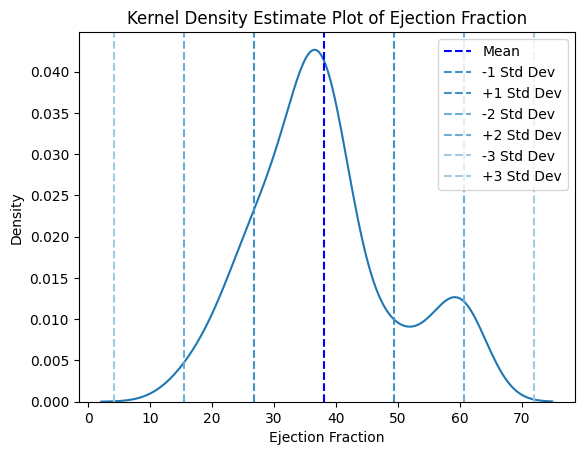

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import statistics


sns.distplot(df1_x_1['ejection_fraction'], hist=False)


mean_ejection_fraction = df1_x_1['ejection_fraction'].mean()
std_dev_ejection_fraction = statistics.stdev(df1_x_1['ejection_fraction'])


plt.axvline(x=mean_ejection_fraction, color='blue', linestyle='--', label='Mean')

# Define a gradient of blue colors with fading shades
blue_gradient = sns.color_palette("Blues_r", n_colors=7)  # Reverse the color palette to have brightest blue at the beginning

# Plot vertical lines at +/- 1, 2, and 3 standard deviations with fading shades of blue
for i in range(1, 4):
    plt.axvline(x=mean_ejection_fraction - i * std_dev_ejection_fraction, color=blue_gradient[i-6], linestyle='--', label=f'-{i} Std Dev')
    plt.axvline(x=mean_ejection_fraction + i * std_dev_ejection_fraction, color=blue_gradient[i-6], linestyle='--', label=f'+{i} Std Dev')

# Set labels and title
plt.xlabel('Ejection Fraction')
plt.ylabel('Density')
plt.title('Kernel Density Estimate Plot of Ejection Fraction')

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
df1_x_2['ejection_fraction'].mean()

38.132183908045974

In [ ]:
df1_x_2['ejection_fraction'].median()

38.0

In [ ]:
statistics.mode(df1_x_2['ejection_fraction'])

35

In [ ]:
statistics.stdev(df1_x_2['ejection_fraction'])

12.24743922039672

In [ ]:
statistics.variance(df1_x_2['ejection_fraction'])

149.9997674573118

In [ ]:
statistics.pvariance(df1_x_2['ejection_fraction'])

149.1376998282468

<ipython-input-160-c140f8e2fe3a>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1_x_1['ejection_fraction'], hist=False)


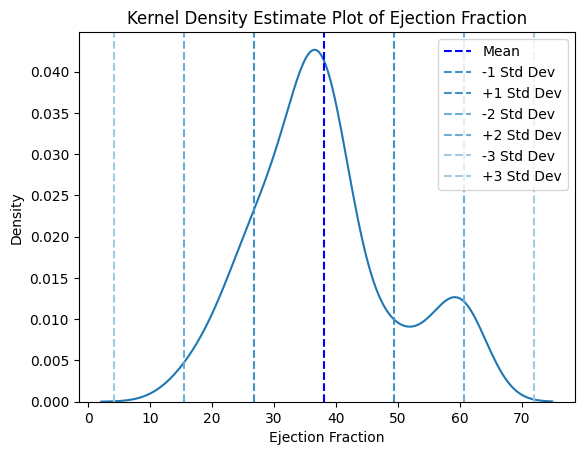

<ipython-input-160-c140f8e2fe3a>:38: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1_x_2['ejection_fraction'], hist=False)


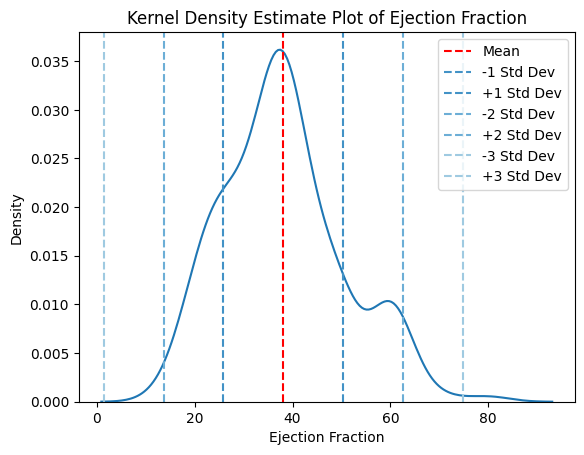

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt
import statistics


sns.distplot(df1_x_1['ejection_fraction'], hist=False)


mean_ejection_fraction = df1_x_1['ejection_fraction'].mean()
std_dev_ejection_fraction = statistics.stdev(df1_x_1['ejection_fraction'])


plt.axvline(x=mean_ejection_fraction, color='blue', linestyle='--', label='Mean')


blue_gradient = sns.color_palette("Blues_r", n_colors=7)


for i in range(1, 4):
    plt.axvline(x=mean_ejection_fraction - i * std_dev_ejection_fraction, color=blue_gradient[i-6], linestyle='--', label=f'-{i} Std Dev')
    plt.axvline(x=mean_ejection_fraction + i * std_dev_ejection_fraction, color=blue_gradient[i-6], linestyle='--', label=f'+{i} Std Dev')


plt.xlabel('Ejection Fraction')
plt.ylabel('Density')
plt.title('Kernel Density Estimate Plot of Ejection Fraction')


plt.legend()


plt.show()



sns.distplot(df1_x_2['ejection_fraction'], hist=False)


mean_ejection_fraction = df1_x_2['ejection_fraction'].mean()
std_dev_ejection_fraction = statistics.stdev(df1_x_2['ejection_fraction'])


plt.axvline(x=mean_ejection_fraction, color='red', linestyle='--', label='Mean')


red_gradient = sns.color_palette("Red_r", n_colors=7)


for i in range(1, 4):
    plt.axvline(x=mean_ejection_fraction - i * std_dev_ejection_fraction, color=blue_gradient[i-6], linestyle='--', label=f'-{i} Std Dev')
    plt.axvline(x=mean_ejection_fraction + i * std_dev_ejection_fraction, color=red_gradient[i-6], linestyle='--', label=f'+{i} Std Dev')


plt.xlabel('Ejection Fraction')
plt.ylabel('Density')
plt.title('Kernel Density Estimate Plot of Ejection Fraction')


plt.legend()


plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()


ejection_fraction_2d = df1_x_1['ejection_fraction'].values.reshape(-1, 1)


normalized_df1 = scaler.fit_transform(ejection_fraction_2d)


ejection_fraction_2d = df1_x_2['ejection_fraction'].values.reshape(-1, 1)

normalized_df2 = scaler.fit_transform(ejection_fraction_2d)


<ipython-input-102-a5227f6b0404>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(normalized_df1, hist=False, label='df1', color='blue')
<ipython-input-102-a5227f6b0404>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(normalized_df2, hist=False, label='df2', color='orange')


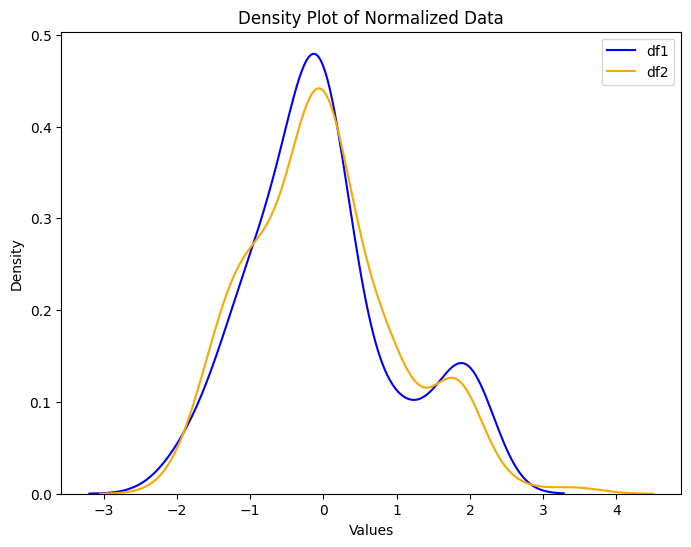

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distplot for normalized_df1 and normalized_df2
plt.figure(figsize=(8, 6))
sns.distplot(normalized_df1, hist=False, label='df1', color='blue')
sns.distplot(normalized_df2, hist=False, label='df2', color='orange')
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Density Plot of Normalized Data')
plt.legend()
plt.show()


In [ ]:
from statsmodels.stats.weightstats import ztest


z_stat, p_value = ztest(df1_x_1['ejection_fraction'], df1_x_2['ejection_fraction'])

print("Z-test p-value:", p_value)


Z-test p-value: 0.9333826513378929


In [ ]:
#Z-test p-value: 0.9333826513378929
#Thus p-value > the significance level of 0.05
#As observed, there is no significance variation of ejection fraction with diabetes presence in patients using Z-test


In [ ]:
from scipy.stats import chi2_contingency


chi2_stat, p_value, _, _ = chi2_contingency(pd.crosstab(df1_x_1['age'], df1_x_1['ejection_fraction']))


print("Chi-squared test p-value:", p_value)


Chi-squared test p-value: 0.21095596388829133


In [ ]:
#Chi-squared test p-value: 0.21095596388829133
#Thus p-value > the significance level of 0.05
#As observed, there is no significance variation of ejection fraction with diabetes presence in patients using Z-test


In [ ]:
from scipy.stats import ttest_ind


t_stat, p_value = ttest_ind(df1_x_1['ejection_fraction'], df1_x_2['ejection_fraction'])


print("T-test p-value:", p_value)


T-test p-value: 0.9334389630426103


In [ ]:
#Student-t test p-value: 0.9334389630426103
#Thus p-value > the significance level of 0.05
#As observed, there is no significance variation of ejection fraction with diabetes presence in patients using Z-test


In [ ]:
from scipy.stats import f_oneway


f_stat, p_value = f_oneway(df1_x_1['ejection_fraction'], df1_x_2['ejection_fraction'])


print("F-test p-value:", p_value)


F-test p-value: 0.9334389630424756


In [ ]:
#F-test p-value: 0.9334389630424756
#Thus p-value > the significance level of 0.05
#As observed, there is no significance variation of ejection fraction with diabetes presence in patients using Z-test


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


model = ols('ejection_fraction ~ C(diabetes)', data=heart_data).fit()


anova_table = sm.stats.anova_lm(model, typ=2)


print(anova_table)


                   sum_sq     df         F    PR(>F)
C(diabetes)      0.981929    1.0  0.006987  0.933439
Residual     41737.927770  297.0       NaN       NaN


In [ ]:
#Anova-test p-value: 0.933439
#Thus p-value > the significance level of 0.05
#As observed, there is no significance variation of ejection fraction with diabetes presence in patients using Z-test


Sure, let's break down each of these values:

1. **sum_sq (Sum of Squares)**: This represents the sum of squared deviations of the dependent variable (ejection fraction) from the mean. For the variable `C(diabetes)`, it represents the sum of squares explained by the effect of diabetes on ejection fraction, while for the residual, it represents the sum of squares not explained by the model.

2. **df (Degrees of Freedom)**: This represents the degrees of freedom associated with the sum of squares. For the variable `C(diabetes)`, it is the number of categories minus 1 (in this case, 1 since there are two categories: diabetes present and diabetes absent). For the residual, it is the total number of observations minus the number of parameters estimated in the model.

3. **F (F-statistic)**: This is the test statistic for the ANOVA test. It represents the ratio of the variance explained by the model to the variance not explained by the model. It is calculated as the mean square explained divided by the mean square residual.

4. **PR(>F) (p-value)**: This is the p-value associated with the F-statistic. It represents the probability of observing an F-statistic as extreme as the one computed from the data, assuming the null hypothesis is true. In this case, it indicates the probability of observing an F-statistic as extreme as 0.006987 under the null hypothesis that there is no effect of diabetes on ejection fraction. Since this p-value is much greater than the typical significance level of 0.05, we fail to reject the null hypothesis and conclude that there is no significant effect of diabetes on ejection fraction.

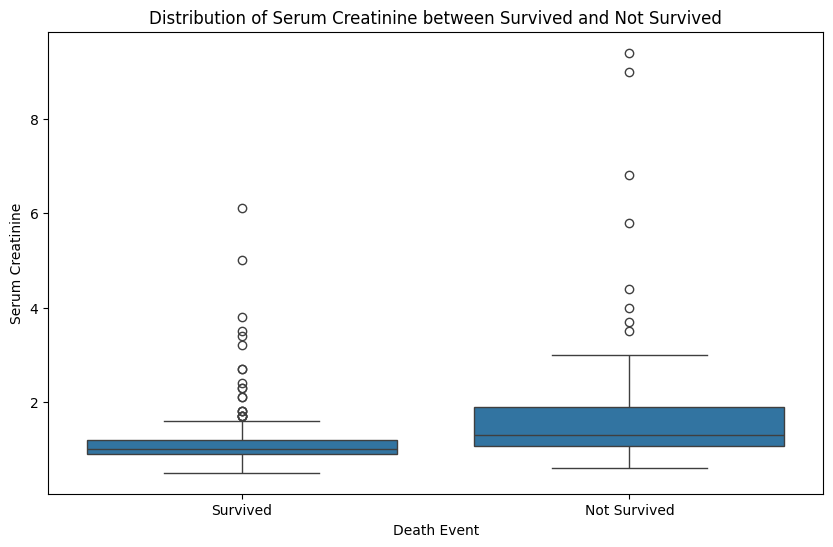

<ipython-input-129-13ba0551209a>:29: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(survived_data['serum_creatinine'], color='blue',  label='Survived', hist=False)
<ipython-input-129-13ba0551209a>:30: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(not_survived_data['serum_creatin

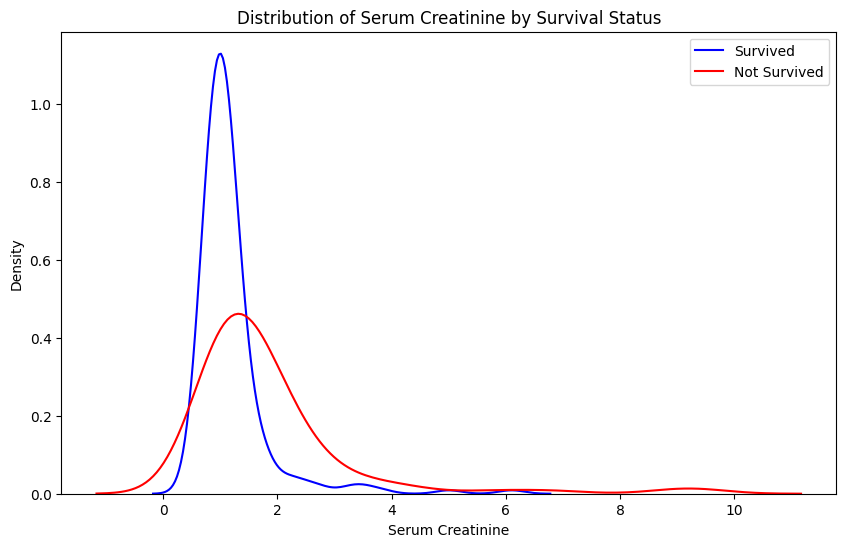

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


survived_data = heart_data[heart_data['DEATH_EVENT'] == 0]
not_survived_data = heart_data[heart_data['DEATH_EVENT'] == 1]


survived_serum_stats = survived_data['serum_creatinine'].describe()


not_survived_serum_stats = not_survived_data['serum_creatinine'].describe()


plt.figure(figsize=(10, 6))
sns.boxplot(x='DEATH_EVENT', y='serum_creatinine', data=heart_data)
plt.xlabel('Death Event')
plt.ylabel('Serum Creatinine')
plt.title('Distribution of Serum Creatinine between Survived and Not Survived')
plt.xticks([0, 1], ['Survived', 'Not Survived'])
plt.show()


plt.figure(figsize=(10, 6))
sns.distplot(survived_data['serum_creatinine'], color='blue',  label='Survived', hist=False)
sns.distplot(not_survived_data['serum_creatinine'], color='red', label='Not Survived', hist=False)
plt.xlabel('Serum Creatinine')
plt.ylabel('Density')
plt.title('Distribution of Serum Creatinine by Survival Status')
plt.legend()
plt.show()


In [ ]:
#Survivors have more outliers beyond the 3rd Quartile present in terms of 'serum_creatinine' as compared to the deceased
#We can see that survivors have less creatinine count as compared to those who didn't survive
#Thus we can say that survivors with lower levels of creatinine have a higher likelihood of survival as compared to their dead counterparts

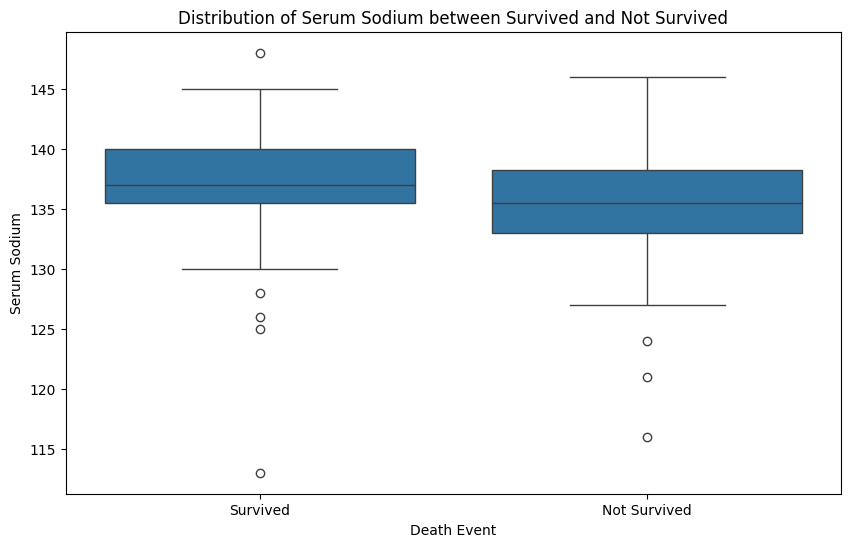

<ipython-input-156-bcbe411f1102>:29: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(survived_data['serum_sodium'], color='blue',  label='Survived', hist=False)
<ipython-input-156-bcbe411f1102>:30: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(not_survived_data['serum_sodium'], c

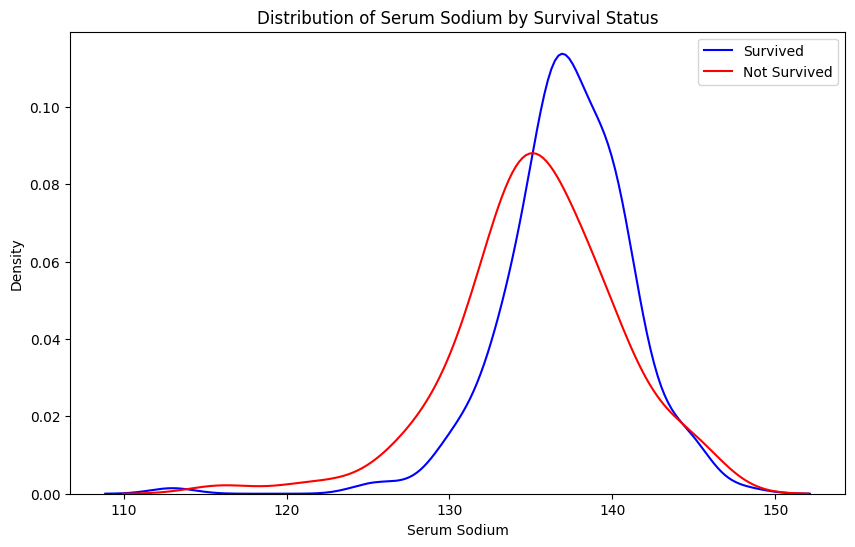

In [156]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


survived_data = heart_data[heart_data['DEATH_EVENT'] == 0]
not_survived_data = heart_data[heart_data['DEATH_EVENT'] == 1]


survived_sodium_stats = survived_data['serum_sodium'].describe()


not_survived_sodium_stats = not_survived_data['serum_sodium'].describe()


plt.figure(figsize=(10, 6))
sns.boxplot(x='DEATH_EVENT', y='serum_sodium', data=heart_data)
plt.xlabel('Death Event')
plt.ylabel('Serum Sodium')
plt.title('Distribution of Serum Sodium between Survived and Not Survived')
plt.xticks([0, 1], ['Survived', 'Not Survived'])
plt.show()


plt.figure(figsize=(10, 6))
sns.distplot(survived_data['serum_sodium'], color='blue',  label='Survived', hist=False)
sns.distplot(not_survived_data['serum_sodium'], color='red', label='Not Survived', hist=False)
plt.xlabel('Serum Sodium')
plt.ylabel('Density')
plt.title('Distribution of Serum Sodium by Survival Status')
plt.legend()
plt.show()


In [ ]:
#Survivors have more outliers beyond the 1st Quartile present in terms of 'serum_sodium' as compared to the deceased
#We can see that survivors have higher sodium count as compared to those who didn't survive
#Thus we can say that survivors with higher levels of creatinine have a higher likelihood of survival as compared to their dead counterparts

In [157]:

corr_survived = survived_data[['serum_creatinine', 'serum_sodium']].corr()
print("Correlation Matrix for Survived Group:")
print(corr_survived)


Correlation Matrix for Survived Group:
                  serum_creatinine  serum_sodium
serum_creatinine          1.000000     -0.215651
serum_sodium             -0.215651      1.000000


In [159]:
#The correlation coefficient between serum creatinine and serum sodium is approximately -0.216, indicating a weak negative correlation.
#This means that as serum creatinine levels increase, serum sodium levels tend to decrease slightly, and vice versa, although the correlation is not very strong.

In [158]:

corr_not_survived = not_survived_data[['serum_creatinine', 'serum_sodium']].corr()
print("Correlation Matrix for Not Survived Group:")
print(corr_not_survived)


Correlation Matrix for Not Survived Group:
                  serum_creatinine  serum_sodium
serum_creatinine          1.000000     -0.094011
serum_sodium             -0.094011      1.000000


In [ ]:
#Comparing it to the correlation matrix for the survived group,
#we can observe that the correlation coefficient between the
#serum creatinine and serum sodium is stronger in the deceased group (-0.215) compared to the survived group (-0.094).


#This implies that there might be a stronger relationship between serum creatinine and serum sodium levels among deceased patients than among survived patients.